In [49]:
#import libraries
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.shape
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [51]:
#2. data preparation

# Check Null values in the dataset
df.isnull()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [53]:
#drop unimportant columns
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# Encode the categorical data
df['Geography'].unique()
df=pd.get_dummies(df,drop_first=True)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [55]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [56]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
X=df.drop('Exited',axis=1)
y=df['Exited']


In [58]:
#Creating Training and Testing Data
# split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [62]:
#applying SVC
from sklearn import svm

In [63]:
svm=svm.SVC()

In [64]:
svm.fit(X_train,y_train)

SVC()

In [65]:
y_pred_new=svm.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_score(y_test,y_pred_new)

0.861

In [73]:
precision_score(y_test,y_pred_new)

0.8341968911917098

In [74]:
#KNeighbors Classifiers
from sklearn.neighbors import KNeighborsClassifier

In [75]:

knn=KNeighborsClassifier()

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_predict_knn=knn.predict(X_test)

In [78]:
accuracy_score(y_test,y_predict_knn)


0.824

In [79]:
precision_score(y_test,y_predict_knn)

0.6222222222222222

In [80]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf=RandomForestClassifier()

In [82]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
y_predict_rf=rf.predict(X_test)

In [84]:
accuracy_score(y_test,y_predict_rf)

0.8585

In [85]:
precision_score(y_test,y_predict_rf)


0.756198347107438

In [87]:
final_df=pd.DataFrame({'Models':['SVC','KNN','RF'],'ACC':[accuracy_score(y_test,y_pred_new),accuracy_score(y_test,y_predict_knn),accuracy_score(y_test,y_predict_rf)]})

In [88]:
final_df

,Models,ACC
0,SVC,0.8610
1,KNN,0.8240
2,RF,0.8585


In [89]:
# Since SVC has the highest accuracy value on our dataset we use SVC as our model

In [90]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

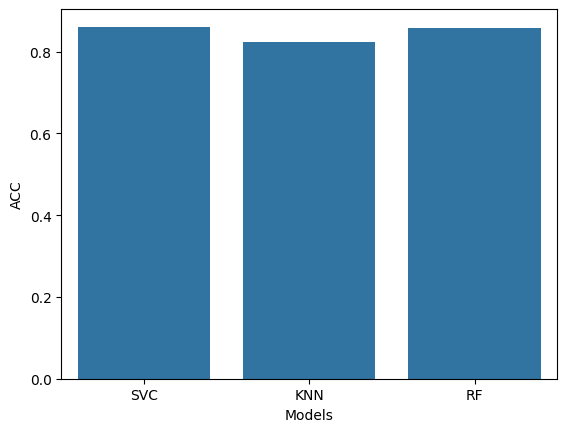

In [91]:
sns.barplot(x=final_df['Models'],y=final_df['ACC'])

In [120]:
!pip install imbalanced-learn

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE



DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.3 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 901.1 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 950.9 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.3 kB 807.1 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 734.2 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 734.2 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 734.2 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 630.2 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 587.9 kB/s 

In [122]:
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [123]:
#save the model of svc
#Enter the entire dataset
X_res=sc.fit_transform(X_res)


In [124]:

svm.fit(X_res,y_res)

SVC()

In [126]:
import joblib
joblib.dump(svm,'churn_predict_model')

['churn_predict_model']

In [127]:
saved_model=joblib.load('churn_predict_model')

In [128]:
df.columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [129]:
saved_model.predict([[400,32,15,111110,0,0,0,10348.88,0,0,1]])

array([1], dtype=int64)